# **SHETH L.U.J. & SIR M.V. COLLEGE**
**Swati Mahajan | T093**
## **Practical No. 10**

**Aim** :- Data Visualization and Storytelling
*  Create meaningful visualizations using data visualization tools
*  Combine multiple visualizations to tell a compelling data story.
*  Present the findings and insights in a clear and concise manner.


**Setup: Importing Libraries and Preparing the Data**

First, we need to load the dataset and prepare it for analysis. A crucial step is converting the 'Order Date' column from text to a proper date format, which allows us to analyze trends over time.

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style and default figure size
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# --- 1. Load the Dataset ---
# IMPORTANT: This code assumes 'Global_Superstore.csv' is in the same directory.
df = pd.read_csv('Datasets/Global_Superstore2.csv', encoding='latin1')

# --- 2. Prepare the Data ---
# Convert 'Order Date' to a proper date format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create 'Year' and 'Month' columns for easier analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Drop the 'Postal Code' column as it has many missing values
df.drop('Postal Code', axis=1, inplace=True)

# Display a confirmation message and the first few rows to verify
print("Dataset loaded and prepared successfully.")
df.head()

Dataset loaded and prepared successfully.


C:\Users\Swati\AppData\Local\Temp\ipykernel_26756\527573419.py:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month
0,32298,CA-2012-124891,2012-07-31,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7
1,26341,IN-2013-77878,2013-02-05,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2
2,25330,IN-2013-71249,2013-10-17,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10
3,13524,ES-2013-1579342,2013-01-28,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1
4,47221,SG-2013-4320,2013-11-05,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11


 # Visualization 1: Bar Chart for Sales by Market 
1: The Big Picture - Where Are Our Sales Coming From?

Let's start by understanding our global footprint. A bar chart is excellent for comparing total sales across different markets.


C:\Users\Swati\AppData\Local\Temp\ipykernel_26756\503728193.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=market_sales.index, y=market_sales.values, palette='viridis')


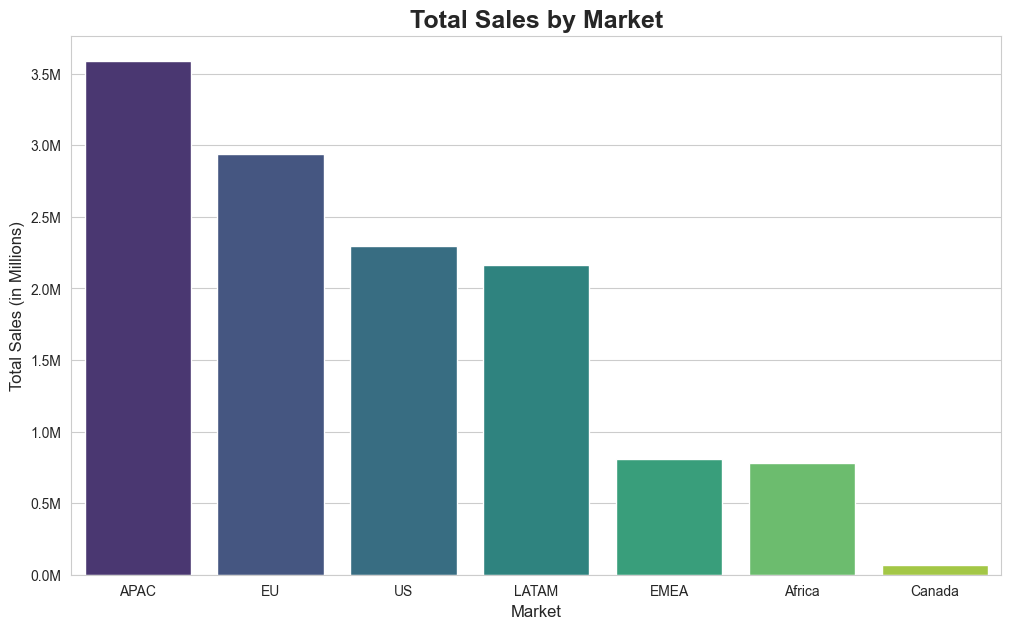

In [4]:
if not df.empty:
    # Group data by Market and sum the sales
    market_sales = df.groupby('Market')['Sales'].sum().sort_values(ascending=False)
    
    # Create the bar plot
    ax = sns.barplot(x=market_sales.index, y=market_sales.values, palette='viridis')
    
    # Add titles and labels for clarity
    plt.title('Total Sales by Market', fontsize=18, fontweight='bold')
    plt.xlabel('Market', fontsize=12)
    plt.ylabel('Total Sales (in Millions)', fontsize=12)
    
    # Format the y-axis to be more readable
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1_000_000:.1f}M'))
    
    plt.show()

**Story Point 1:**

"Business has a strong presence in the APAC (Asia-Pacific) and EU markets, which together account for the majority of our revenue. In contrast, the Canadian and African markets represent our smallest segments. This immediately tells us where our core business lies and points to potential areas for future growth."

# Visualization 2: Bar Chart for Profit by Sub-Category 
2: The Profit Story - Which Products are Winners and Losers?
High sales don't always mean high profit. Let's use another bar chart to see which product sub-categories are the most and least profitable.


C:\Users\Swati\AppData\Local\Temp\ipykernel_26756\604258990.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=subcategory_profit.index, x=subcategory_profit.values, palette='coolwarm')


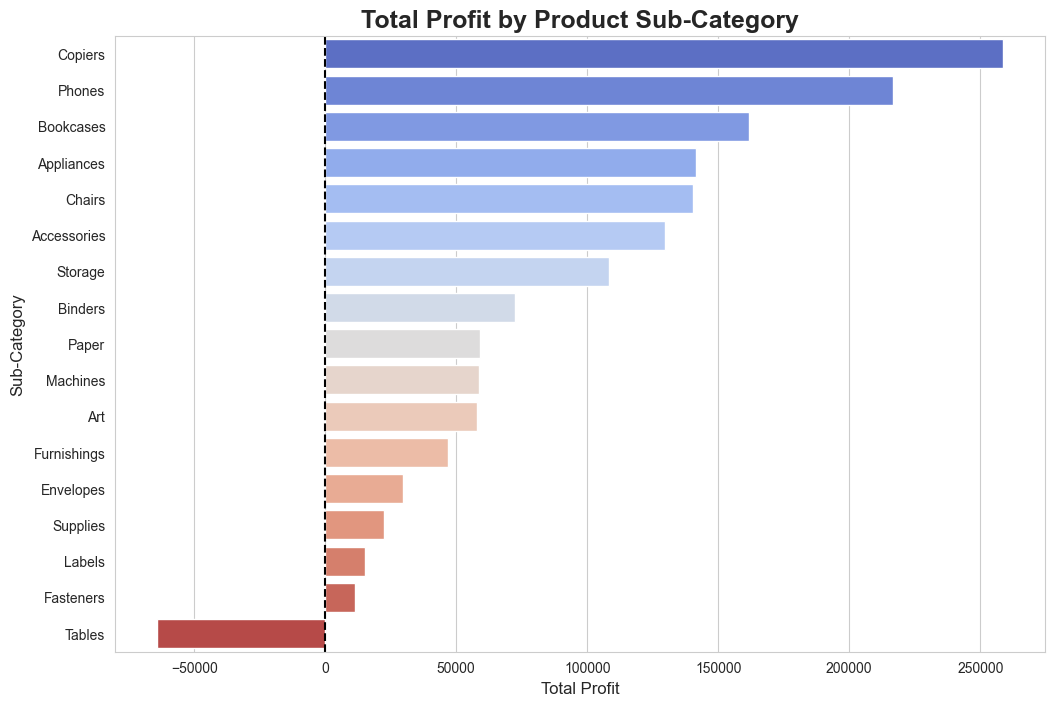

In [5]:
if not df.empty:
    # Group data by Sub-Category and sum the profits
    subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
    
    # Create the horizontal bar plot for better label readability
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(y=subcategory_profit.index, x=subcategory_profit.values, palette='coolwarm')
    
    # Add titles and labels
    plt.title('Total Profit by Product Sub-Category', fontsize=18, fontweight='bold')
    plt.xlabel('Total Profit', fontsize=12)
    plt.ylabel('Sub-Category', fontsize=12)
    
    # Add a vertical line at zero to clearly distinguish profit from loss
    plt.axvline(x=0, color='black', linestyle='--')
    
    plt.show()

**Story Point 2:**

"A deep dive into profitability reveals a critical insight: some of our products are losing money. While Copiers and Phones are our profit powerhouses, Tables and Bookcases are significant loss-makers. This suggests a problem in our pricing or cost structure for these specific furniture items."

# Visualization 3: Line Plot for Sales and Profit Over Time 

3: The Time Dimension - How Are We Trending?

Now, let's look at performance over time. A line plot is the best way to visualize trends in Sales and Profit.


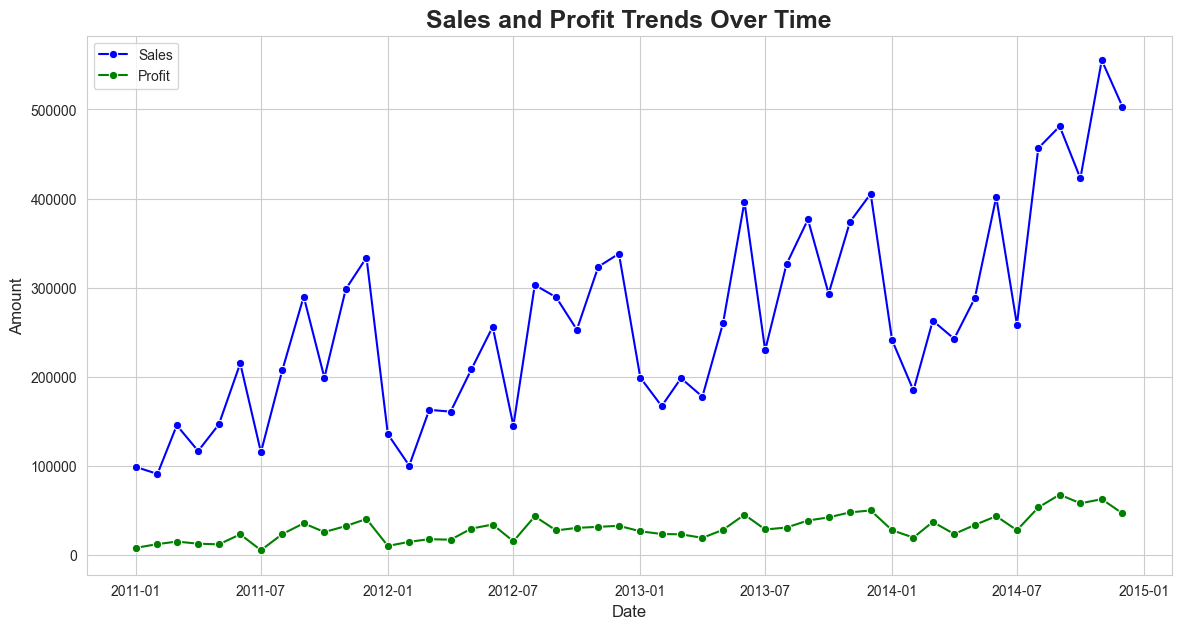

In [6]:
if not df.empty:
    # Create a Year-Month column for aggregation
    df['YearMonth'] = df['Order Date'].dt.to_period('M')
    
    # Group by Year-Month and sum Sales and Profit
    time_series_data = df.groupby('YearMonth')[['Sales', 'Profit']].sum().reset_index()
    time_series_data['YearMonth'] = time_series_data['YearMonth'].dt.to_timestamp() # Convert back for plotting
    
    # Create the line plot
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='YearMonth', y='Sales', data=time_series_data, label='Sales', color='blue', marker='o')
    sns.lineplot(x='YearMonth', y='Profit', data=time_series_data, label='Profit', color='green', marker='o')
    
    # Add titles and labels
    plt.title('Sales and Profit Trends Over Time', fontsize=18, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Amount', fontsize=12)
    plt.legend()
    plt.show()

**Story Point 3:**

"Overall Sales show a healthy, consistent growth trend over the years. However, our Profit is much more volatile. We see recurring sharp dips, especially at the end of each year, suggesting that our promotional strategies during peak seasons might be hurting our bottom line."

# Visualization 4: Scatter Plot of Discount vs. Profit 
4: The 'Why' - Investigating the Profitability Problem

Let's use a scatter plot to investigate the relationship between discounts and profitability.


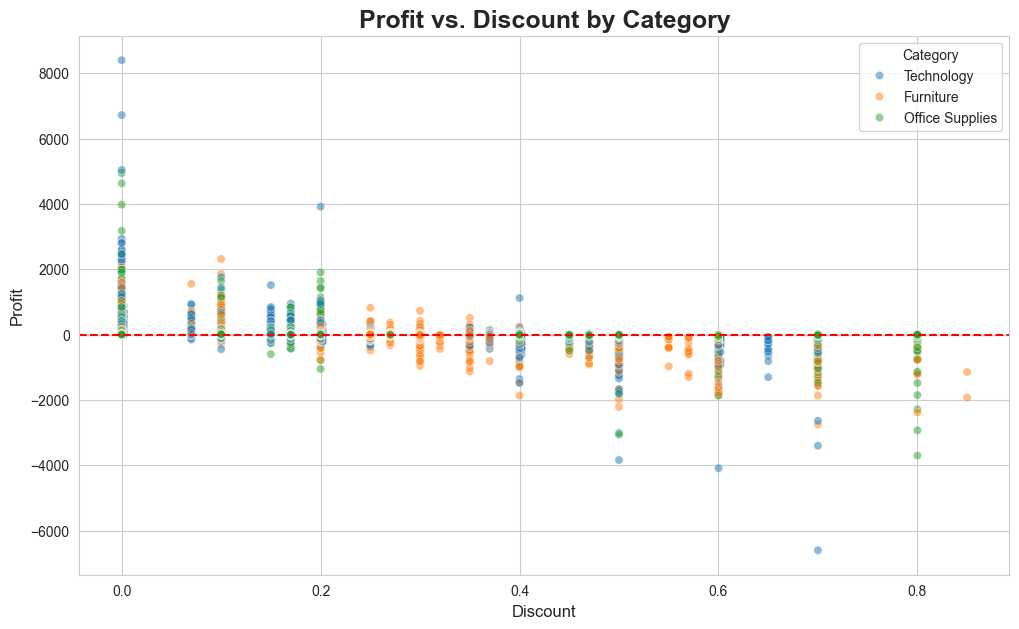

In [7]:
if not df.empty:
    # Create the scatter plot
    sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5, hue='Category')
    
    # Add titles and labels
    plt.title('Profit vs. Discount by Category', fontsize=18, fontweight='bold')
    plt.xlabel('Discount', fontsize=12)
    plt.ylabel('Profit', fontsize=12)
    
    # Add a horizontal line at zero profit
    plt.axhline(y=0, color='red', linestyle='--')
    
    plt.show()

**Story Point 4:**

"This scatter plot confirms our suspicion. There is a clear negative correlation between Discount and Profit. As we offer higher discounts (anything above 20%), our profit margins collapse, and we start to see significant losses, particularly in the 'Furniture' category. This is the primary driver of our profit volatility."

# Visualization 5: Pie Chart for Sales by Customer Segment

Pie Chart & Exploded Pie Chart: Who Are Our Customers?



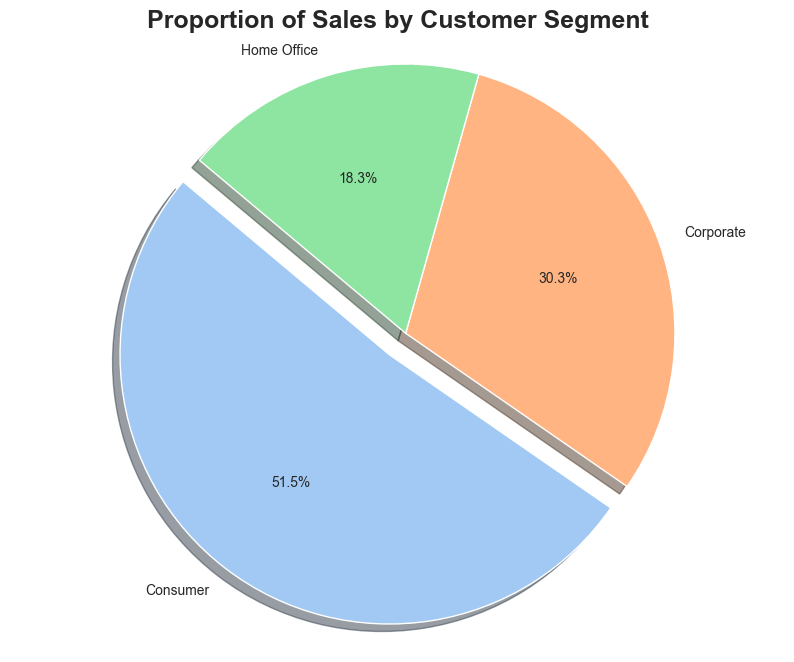

In [8]:
if not df.empty:
    segment_sales = df.groupby('Segment')['Sales'].sum()
    
    # Explode the largest segment ('Consumer')
    explode = (0.1, 0, 0) 
    
    plt.figure(figsize=(10, 8))
    plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', 
            startangle=140, explode=explode, shadow=True, colors=sns.color_palette('pastel'))
            
    plt.title('Proportion of Sales by Customer Segment', fontsize=18, fontweight='bold')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


**Story Point 5:**

"The 'Consumer' segment is our largest, making up half of our sales. The 'Corporate' and 'Home Office' segments are smaller but still significant."

# Visualization 6: Distribution Plot for Profit

Distribution Plot (Histogram): What is the typical order profit?


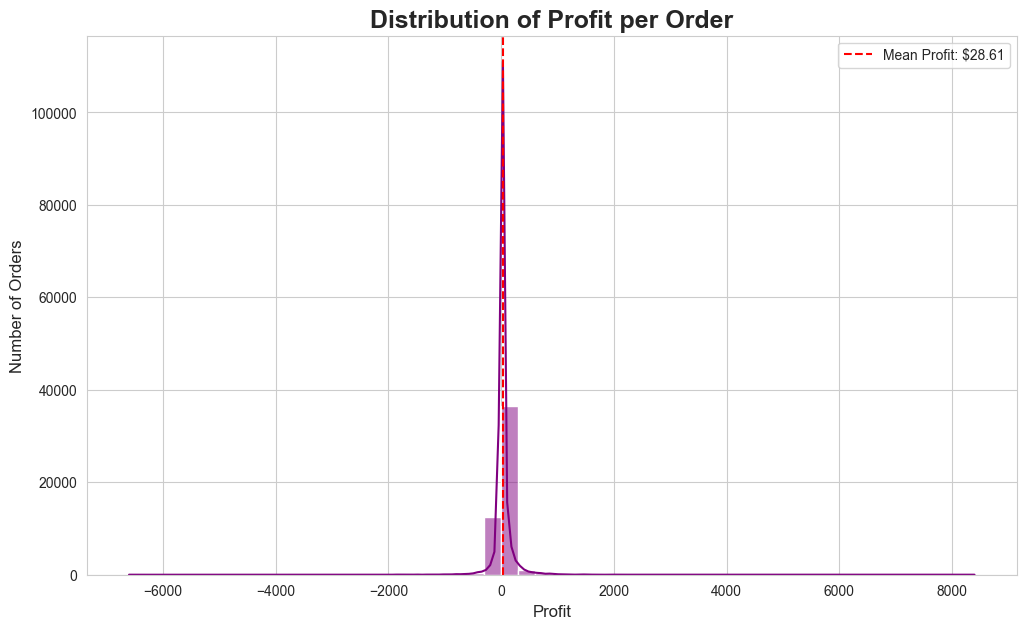

In [9]:
if not df.empty:
    sns.histplot(df['Profit'], kde=True, bins=50, color='purple')
    
    plt.title('Distribution of Profit per Order', fontsize=18, fontweight='bold')
    plt.xlabel('Profit', fontsize=12)
    plt.ylabel('Number of Orders', fontsize=12)
    
    # Add a vertical line for the mean profit
    plt.axvline(df['Profit'].mean(), color='red', linestyle='--', label=f"Mean Profit: ${df['Profit'].mean():.2f}")
    plt.legend()
    plt.show()


**Story Point 6:**

 "While the average profit per order is positive, the distribution shows a large number of orders with small profits and a significant tail of loss-making orders, reinforcing our profitability concerns."


# Visualization 7: Box Plot for Profit by Category 

Box Plot: How does profit vary across categories?



C:\Users\Swati\AppData\Local\Temp\ipykernel_26756\2323217498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Profit', data=df, palette='Set2')


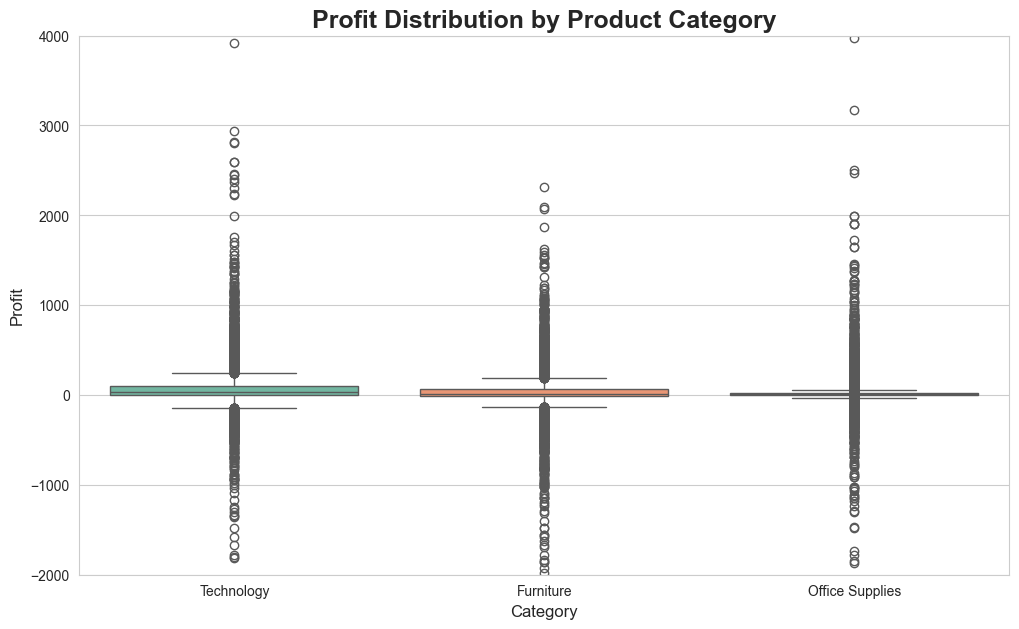

In [10]:
if not df.empty:
    # Limit the y-axis to see the box distributions more clearly, as outliers are extreme
    sns.boxplot(x='Category', y='Profit', data=df, palette='Set2')
    plt.ylim(-2000, 4000) # Zoom in to see the box details
    
    plt.title('Profit Distribution by Product Category', fontsize=18, fontweight='bold')
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Profit', fontsize=12)
    plt.show()

**Story Point 7:**

"The box plot provides a stark comparison. The 'Furniture' category not only has the lowest median profit but also the most extreme losses (as seen by the many outliers below zero). This further validates that 'Furniture' is our most problematic category."

**#Findings:**
Business is strong in the APAC and EU markets but weak elsewhere.
The "Furniture" category, specifically "Tables," is consistently unprofitable.
Overall sales are growing, but profitability is unstable, especially due to high end-of-year discounts.
The Root Cause: Offering discounts over 20% is the primary reason for loss-making orders.


"Our data story reveals that while Global Superstore is growing, its profitability is at risk. The key issue lies in our discount strategy and the poor performance of the Furniture category. We recommend an immediate review of discounts above 20%, especially for Tables and Bookcases. Furthermore, we should focus marketing efforts on our high-profit categories like Technology while exploring targeted strategies to enter and grow in the African and Canadian markets."